In [62]:
import polaris as po
import numpy as np
import datamol as dm
from config import settings


benchmark = po.load_benchmark("polaris/pkis1-kit-wt-mut-c-1")
train, test = benchmark.get_train_test_split()
train[0]


2024-06-20 16:47:36.823 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).
2024-06-20 16:47:36.830 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).


('O=C(Nc1n[nH]c2cc(-c3ccc(F)cc3)ccc12)C1CC1',
 {'CLASS_KIT_(T6701_mutant)': 0.0,
  'CLASS_KIT_(V560G_mutant)': 0.0,
  'CLASS_KIT': 0.0})

In [63]:
benchmark.dataset.table.columns

Index(['UNIQUE_ID', 'smiles', 'EGFR_(L858R_mutant)', 'EGFR',
       'KIT_(T6701_mutant)', 'KIT_(V560G_mutant)', 'KIT', 'RET_(V804L_mutant)',
       'RET_(Y791F_mutant)', 'RET', 'CLASS_EGFR_(L858R_mutant)', 'CLASS_EGFR',
       'CLASS_KIT_(T6701_mutant)', 'CLASS_KIT_(V560G_mutant)', 'CLASS_KIT',
       'CLASS_RET_(V804L_mutant)', 'CLASS_RET_(Y791F_mutant)', 'CLASS_RET'],
      dtype='object')

In [64]:
benchmark.dataset.table

,UNIQUE_ID,smiles,EGFR_(L858R_mutant),EGFR,KIT_(T6701_mutant),KIT_(V560G_mutant),KIT,RET_(V804L_mutant),RET_(Y791F_mutant),RET,CLASS_EGFR_(L858R_mutant),CLASS_EGFR,CLASS_KIT_(T6701_mutant),CLASS_KIT_(V560G_mutant),CLASS_KIT,CLASS_RET_(V804L_mutant),CLASS_RET_(Y791F_mutant),CLASS_RET
0,0064fe324208a6aa97ccec1ccf25db42ca6b95d7,O=C(Nc1n[nH]c2cc(-c3ccc(F)cc3)ccc12)C1CC1,4.19,4.27,4.92,0.08,5.10,3.06,2.03,3.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,013a72f32dffbeacfb15d65870e7dc0023a1b866,O=C1NC(=O)C(c2ccccc2)=C1Nc1ccccc1,5.64,10.70,8.44,2.76,14.88,8.73,21.57,10.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0232607ab2b52c886252c94887081bc848161ab2,CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OC3CCNCC3...,2.18,3.18,-0.54,0.39,3.87,4.05,17.13,10.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,02b4a8361883b8b9273e1a47629a8f2faa2b0f70,CN(C)c1cc2c(Nc3ccc4c(cnn4Cc4ccccc4)c3)ncnc2cn1,93.40,87.31,-0.32,2.75,3.38,0.35,34.35,13.63,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,03504a4a6f3ce2e020de8369c57774f74212076f,NS(=O)(=O)c1ccc(Nc2cc(-c3ccc(O)c(F)c3)n[nH]2)cc1,-2.00,3.68,20.16,55.90,86.43,47.58,55.46,54.96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,fa9cebd4af8a76cbc9d8fd887092ff5a9cb9ecd4,Cc1cccc(Oc2nccc(-c3c(-c4ccc(F)cc4)ncn3C3CCNCC3...,35.26,7.82,4.27,-0.30,4.89,8.02,8.15,7.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,fcfb5324a99299bf9ec66be5c13dbe5323af68e6,Cc1ccc(NC(=O)c2ccoc2)cc1-c1ccc(C(=O)NCC2CC2)cc1,1.00,6.36,1.82,-1.21,0.22,2.38,4.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,fd1e694f0a3147d73246d9c47ff960192508f50f,CS(=O)(=O)Nc1ccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c...,-0.40,2.27,1.56,0.94,6.32,8.77,6.93,6.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,fe3363eb245d5c95797a830557cae98553e9b5ee,CNC(=O)c1ncccc1Nc1nc(Nc2cc3c(cc2OC)CCCN3C(=O)C...,22.39,7.76,1.68,0.67,3.44,20.39,27.15,9.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_train = benchmark.dataset.table.loc[benchmark.dataset.table['smiles'].isin(train.X)]
df_train

,UNIQUE_ID,smiles,EGFR_(L858R_mutant),EGFR,KIT_(T6701_mutant),KIT_(V560G_mutant),KIT,RET_(V804L_mutant),RET_(Y791F_mutant),RET,CLASS_EGFR_(L858R_mutant),CLASS_EGFR,CLASS_KIT_(T6701_mutant),CLASS_KIT_(V560G_mutant),CLASS_KIT,CLASS_RET_(V804L_mutant),CLASS_RET_(Y791F_mutant),CLASS_RET
0,0064fe324208a6aa97ccec1ccf25db42ca6b95d7,O=C(Nc1n[nH]c2cc(-c3ccc(F)cc3)ccc12)C1CC1,4.19,4.27,4.92,0.08,5.10,3.06,2.03,3.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0232607ab2b52c886252c94887081bc848161ab2,CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OC3CCNCC3...,2.18,3.18,-0.54,0.39,3.87,4.05,17.13,10.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,02b4a8361883b8b9273e1a47629a8f2faa2b0f70,CN(C)c1cc2c(Nc3ccc4c(cnn4Cc4ccccc4)c3)ncnc2cn1,93.40,87.31,-0.32,2.75,3.38,0.35,34.35,13.63,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,03e6e4ceea0ce606abd3b1a4d7cb9e8af2853c32,NS(=O)(=O)c1cccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c...,-2.32,0.71,-1.90,4.07,0.12,-1.66,-2.02,1.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,04018484ac35cbc6995113d0c79051fabe4ce427,Cc1nn(C)c2cc(N(C)c3ccnc(Nc4cccc(S(N)(=O)=O)c4)...,16.04,13.88,38.21,37.27,88.04,34.16,46.83,39.04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,fa9cebd4af8a76cbc9d8fd887092ff5a9cb9ecd4,Cc1cccc(Oc2nccc(-c3c(-c4ccc(F)cc4)ncn3C3CCNCC3...,35.26,7.82,4.27,-0.30,4.89,8.02,8.15,7.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,fcfb5324a99299bf9ec66be5c13dbe5323af68e6,Cc1ccc(NC(=O)c2ccoc2)cc1-c1ccc(C(=O)NCC2CC2)cc1,1.00,6.36,1.82,-1.21,0.22,2.38,4.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,fd1e694f0a3147d73246d9c47ff960192508f50f,CS(=O)(=O)Nc1ccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c...,-0.40,2.27,1.56,0.94,6.32,8.77,6.93,6.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,fe3363eb245d5c95797a830557cae98553e9b5ee,CNC(=O)c1ncccc1Nc1nc(Nc2cc3c(cc2OC)CCCN3C(=O)C...,22.39,7.76,1.68,0.67,3.44,20.39,27.15,9.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
all(train.X == df_train['smiles'].values)

True

In [308]:
def inverse_sigmoid(x):
    return np.log(x / (1 - x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

kit_columns = ['KIT_(T6701_mutant)', 'KIT_(V560G_mutant)', 'KIT']

offset = 1
divby = 100
epsilon = 1e-2

kit_vals_normalized = (df_train[kit_columns]+offset) / divby
kit_vals_normalized[kit_vals_normalized <= 0.] = epsilon
kit_vals_normalized[kit_vals_normalized >= 1.] = 1-epsilon

kit_vals_processed = inverse_sigmoid(kit_vals_normalized)
# kit_vals_processed = np.log(kit_vals_normalized)

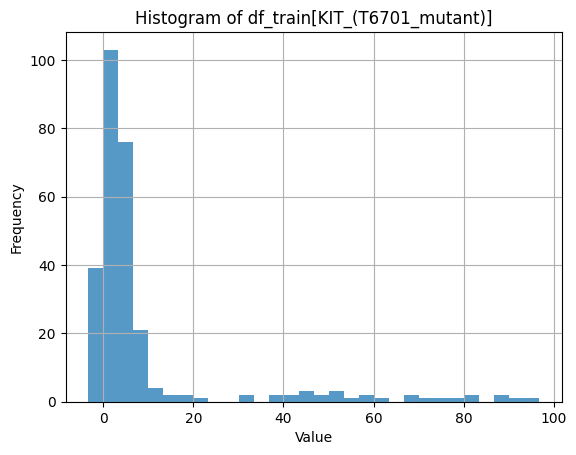

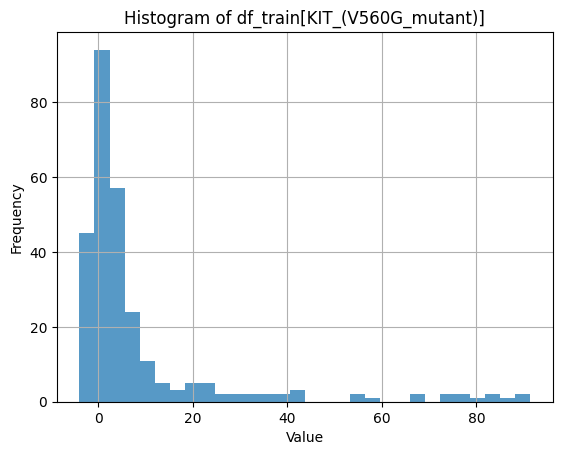

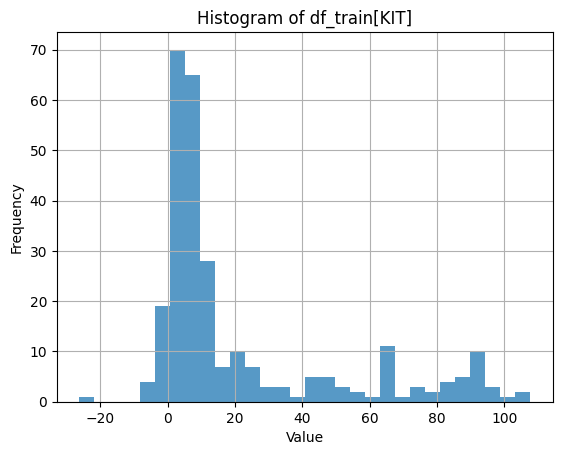

In [309]:
for col in kit_columns:
    # Assuming kit_vals_normalized is a NumPy array or a list of values
    import matplotlib.pyplot as plt

    plt.hist(df_train[col].to_numpy().flatten(), bins=30, alpha=0.75)
    plt.title(f'Histogram of df_train[{col}]')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

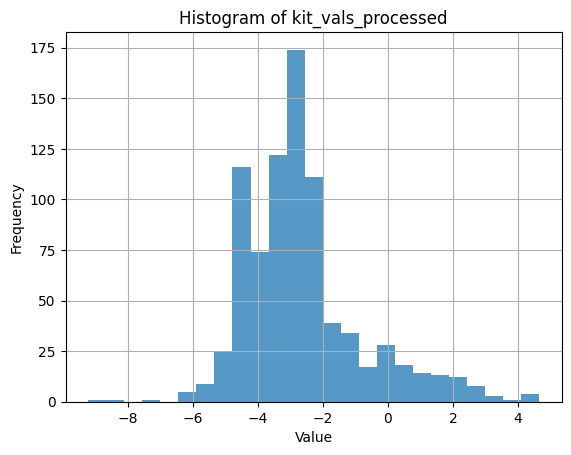

In [310]:
# Assuming kit_vals_normalized is a NumPy array or a list of values
import matplotlib.pyplot as plt

plt.hist(kit_vals_processed.to_numpy().flatten(), bins=25, alpha=0.75)
plt.title('Histogram of kit_vals_processed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

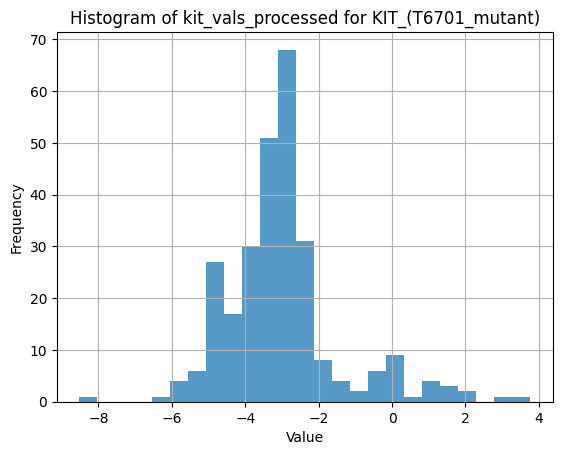

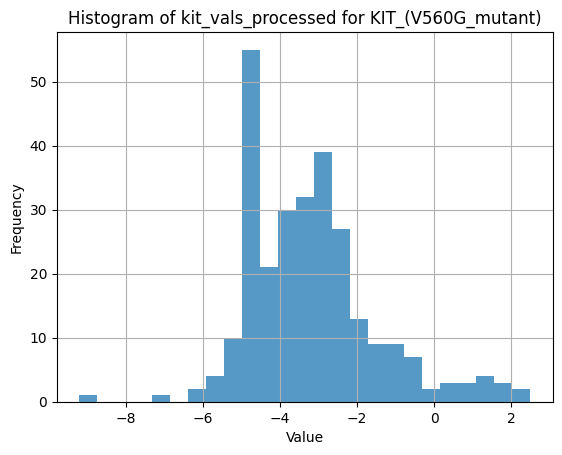

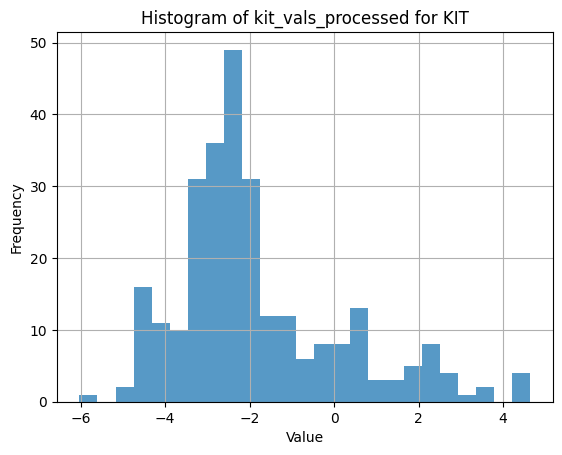

In [311]:
for col in kit_columns:

    # Assuming kit_vals_normalized is a NumPy array or a list of values
    import matplotlib.pyplot as plt

    plt.hist(kit_vals_processed[col].to_numpy().flatten(), bins=25, alpha=0.75)
    plt.title(f'Histogram of kit_vals_processed for {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [320]:

def featurization_fn(smiles):
    return dm.to_fp(smiles)#, fp_type="ecfp", radius=2, fpSize=2048)

train, test = benchmark.get_train_test_split(featurization_fn=featurization_fn)

ys = train.y
ys = np.stack([ys[target] for target in benchmark.target_cols], axis=1)
ys.shape
mask = ~np.any(np.isnan(ys), axis=1)


In [271]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=5)
model.fit(train.X[mask], kit_vals_processed[mask])


(87, 3)

In [302]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=30.0)
model.fit(train.X[mask], kit_vals_processed[mask])

Ridge(alpha=30.0)

In [303]:

# y_pred = sigmoid(model.predict(test.X))
y_pred = np.exp(model.predict(test.X))
y_pred.shape

(87, 3)

In [304]:
y_prob = np.stack([1-y_pred, y_pred], axis=2)
y_prob.shape


(87, 3, 2)

In [305]:
y_pred = y_pred > 0.5

In [306]:
y_pred = {k: y_pred[:, idx] for idx, k in enumerate(benchmark.target_cols)}
y_prob = {k: y_prob[:, idx, 1] for idx, k in enumerate(benchmark.target_cols)}

In [307]:
results = benchmark.evaluate(y_pred=y_pred, y_prob=y_prob)
results

{
  "name": null,
  "description": "",
  "tags": [],
  "user_attributes": {},
  "owner": null,
  "polaris_version": "dev",
  "benchmark_name": "pkis1-kit-wt-mut-c-1",
  "benchmark_owner": {
    "slug": "polaris",
    "external_id": "org_2gtoaJIVrgRqiIR8Qm5BnpFCbxu",
    "type": "organization"
  },
  "github_url": null,
  "paper_url": null,
  "contributors": null,
  "artifact_id": null,
  "benchmark_artifact_id": "polaris/pkis1-kit-wt-mut-c-1",
  "results": [
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "accuracy",
      "Score": 0.8505747126
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "accuracy",
      "Score": 0.8965517241
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "accuracy",
      "Score": 0.7011494253
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "f1",
      "Score": 0.1333333333
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "f1",
      "Score": 0.4
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "f1",
      "Score": 0.4090909091
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "roc_auc",
      "Score": 0.7837573386
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "roc_auc",
      "Score": 0.79
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "roc_auc",
      "Score": 0.8075196409
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "pr_auc",
      "Score": 0.4297378089
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "pr_auc",
      "Score": 0.5050642817
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "pr_auc",
      "Score": 0.7048191882
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "mcc",
      "Score": 0.2462340944
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "mcc",
      "Score": 0.4724555913
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "mcc",
      "Score": 0.3441060448
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.114330462
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.3649635036
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "cohen_kappa",
      "Score": 0.2707930368
    }
  ]
}

In [188]:
# results.name = "team8_v1"
# results.description = "1st day best result"
# results.upload_to_hub(owner="piotrsuwara")


2024-06-20 17:26:27.096 | SUCCESS  | polaris.hub.client:upload_results:492 - Your result has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-kit-wt-mut-c-1/3RpZxb228aaj9NuSx0Tfe


{'id': '3RpZxb228aaj9NuSx0Tfe',
 'createdAt': '2024-06-20T21:26:27.067Z',
 'deletedAt': None,
 'name': 'team8_v1',
 'slug': 'team8_v1',
 'description': '1st day best result',
 'tags': [],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': 'dev',
 'ownerId': 'A6MVm3efdNVp8DabQVnvq',
 'creatorId': 'A6MVm3efdNVp8DabQVnvq',
 'benchmarkId': 'DZzlykxvBwlSA9uERL17A',
 'results': [{'scores': {'f1': 0.4444444444444444,
    'mcc': 0.37428570204651607,
    'pr_auc': 0.6896595711841333,
    'roc_auc': 0.7744107744107744,
    'accuracy': 0.7126436781609196,
    'cohen_kappa': 0.30355427473583085},
   'testSet': 'test',
   'targetLabel': 'CLASS_KIT'},
  {'scores': {'f1': 0,
    'mcc': -0.04722297700467238,
    'pr_auc': 0.5432081758555553,
    'roc_auc': 0.8131115459882583,
    'accuracy': 0.8275862068965517,
    'cohen_kappa': -0.02192638997650742},
   'testSet': 'test',
   'targetLabel': 'CLASS_KIT_(T6701_mutant)'},
  {'scores': {'f1': 0,
    'mcc': -0.043133109

Classifiers

In [328]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)
model.fit(train.X[mask], ys[mask])

y_pred = model.predict(test.X)

y_prob = model.predict_proba(test.X)
y_prob = np.stack(y_prob, axis=1)

y_pred = {k: y_pred[:, idx] for idx, k in enumerate(benchmark.target_cols)}
y_prob = {k: y_prob[:, idx, 1] for idx, k in enumerate(benchmark.target_cols)}

results = benchmark.evaluate(y_pred=y_pred, y_prob=y_prob)
results

{
  "name": null,
  "description": "",
  "tags": [],
  "user_attributes": {},
  "owner": null,
  "polaris_version": "dev",
  "benchmark_name": "pkis1-kit-wt-mut-c-1",
  "benchmark_owner": {
    "slug": "polaris",
    "external_id": "org_2gtoaJIVrgRqiIR8Qm5BnpFCbxu",
    "type": "organization"
  },
  "github_url": null,
  "paper_url": null,
  "contributors": null,
  "artifact_id": null,
  "benchmark_artifact_id": "polaris/pkis1-kit-wt-mut-c-1",
  "results": [
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "accuracy",
      "Score": 0.8390804598
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "accuracy",
      "Score": 0.8620689655
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "accuracy",
      "Score": 0.6206896552
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "roc_auc",
      "Score": 0.6110567515
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "roc_auc",
      "Score": 0.7227777778
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "roc_auc",
      "Score": 0.8075196409
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "pr_auc",
      "Score": 0.3211949921
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "pr_auc",
      "Score": 0.3620207066
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "pr_auc",
      "Score": 0.6692540874
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "cohen_kappa",
      "Score": 0.0
    }
  ]
}